In [1]:
var openDigger = require('../src/open_digger');

In [2]:
//只有github_log有有用的信息
var query = openDigger.driver.clickhouse.query;
query(`SHOW DATABASES`).then(res=>{
    console.log(res);
})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [3]:
query(   
    `SHOW TABLES from github_log`)
    .then( res=>{
        console.log(res);
       })


[ { name: 'events' } ]


In [4]:
const repo_id = '28457823'
var years = [2015,2016,2017,2018,2019,2020,2021] //项目从15年开始

In [125]:
// 看看有什么字段
query(`select * 
    from github_log.events 
    where repo_id = ${repo_id}
    And type = 'IssueCommentEvent'
    AND action = 'created'
    AND issue_comments = 0
    And toYear(created_at) = 2015
    limit 1` )
    .then(res=>{console.log(res)})

[
  {
    id: '3050149514',
    type: 'IssueCommentEvent',
    action: 'created',
    actor_id: '6775919',
    actor_login: 'BerkeleyTrue',
    repo_id: '28457823',
    repo_name: 'FreeCodeCamp/freecodecamp',
    org_id: '9892522',
    org_login: 'FreeCodeCamp',
    created_at: '2015-08-11 21:03:10',
    issue_id: '100399472',
    issue_number: 1726,
    issue_title: 'can anyone help? wtf is this and what does it d?',
    body: '@sevmin40 Give context on what is going on.\r\n' +
      '\r\n' +
      'Also, please update title to something more appropriate.\r\n' +
      '\r\n' +
      'Right now this is just a bunch of noise. Move all this text into a [gist](https://gist.github.com/) and in here put context and the issue your are facing.\r\n' +
      '\r\n' +
      "I'm closing this issue until you address the above points.\r\n" +
      '\r\n' +
      'Happy Coding!',
    'issue_labels.name': [],
    'issue_labels.color': [],
    'issue_labels.default': [],
    'issue_labels.description

# 1.1 每月新增 Star 个数

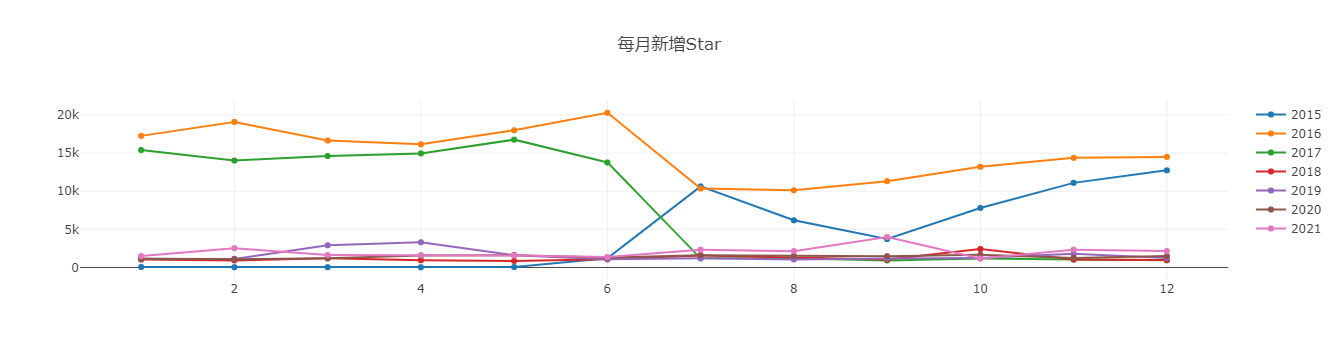

In [6]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'WatchEvent'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月新增Star'});
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


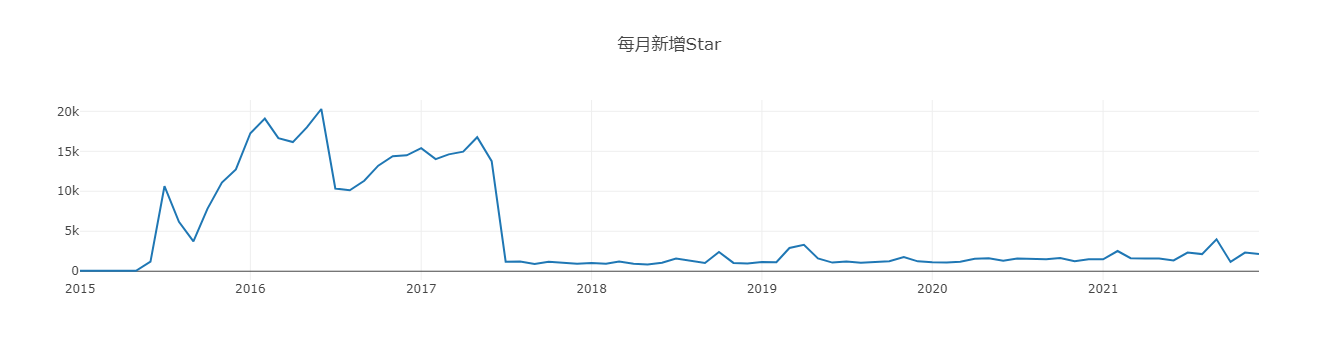

In [14]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'WatchEvent'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月新增Star'});
    
})


# 1.2 每月新增 Fork个数

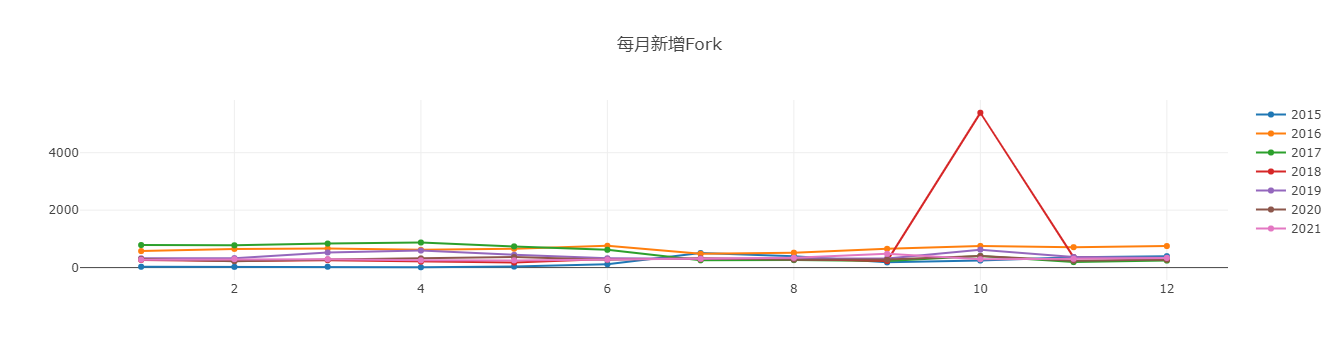

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  29   │ '2015-1'  │
│    1    │  26   │ '2015-2'  │
│    2    │  31   │ '2015-3'  │
│    3    │  12   │ '2015-4'  │
│    4    │  36   │ '2015-5'  │
│    5    │  116  │ '2015-6'  │
│    6    │  506  │ '2015-7'  │
│    7    │  398  │ '2015-8'  │
│    8    │  182  │ '2015-9'  │
│    9    │  246  │ '2015-10' │
│   10    │  359  │ '2015-11' │
│   11    │  397  │ '2015-12' │
│   12    │  575  │ '2016-1'  │
│   13    │  651  │ '2016-2'  │
│   14    │  665  │ '2016-3'  │
│   15    │  617  │ '2016-4'  │
│   16    │  657  │ '2016-5'  │
│   17    │  759  │ '2016-6'  │
│   18    │  481  │ '2016-7'  │
│   19    │  518  │ '2016-8'  │
│   20    │  653  │ '2016-9'  │
│   21    │  753  │ '2016-10' │
│   22    │  710  │ '2016-11' │
│   23    │  750  │ '2016-12' │
│   24    │  785  │ '2017-1'  │
│   25    │  776  │ '2017-2'  │
│   26    │  837  │ '2017-3'  │
│   27    │  873  │ '2017-4'  │
│   28  

In [15]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'ForkEvent'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月新增Fork'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


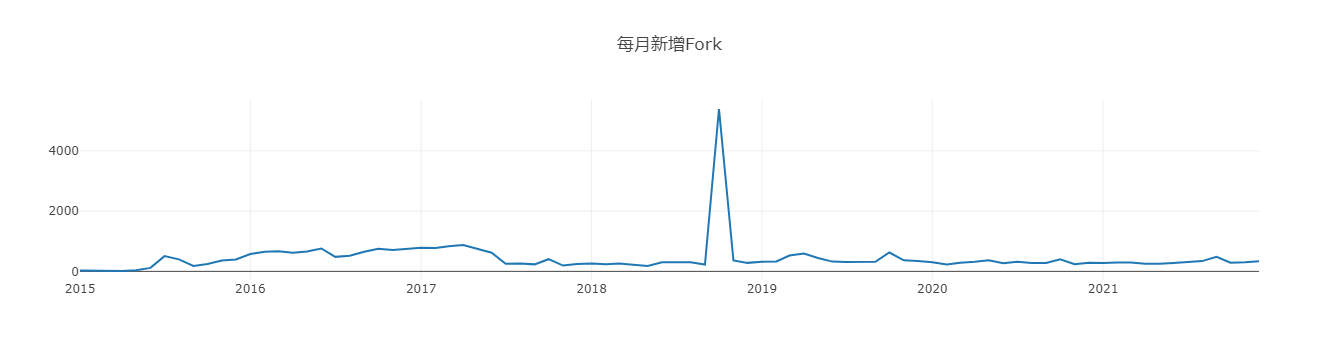

In [16]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'ForkEvent'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月新增Fork'});
    
})


# 2.1 每月打开Issue

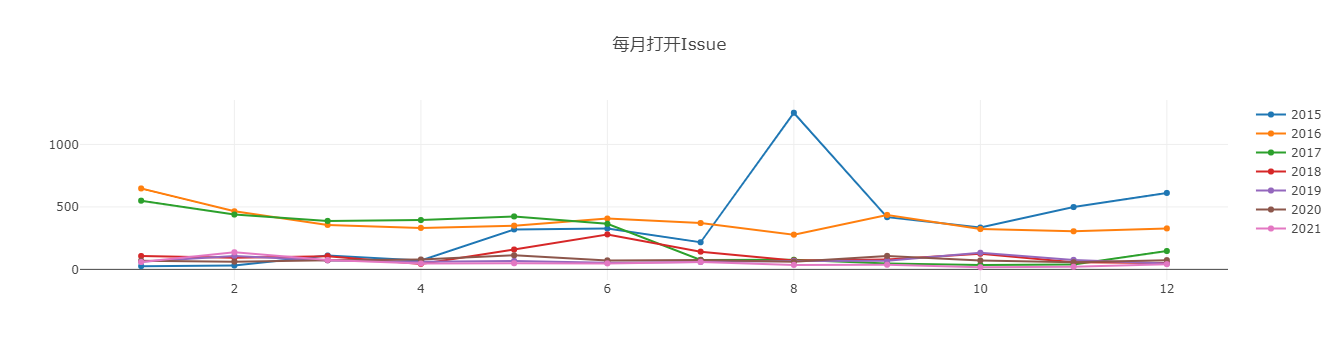

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  26   │ '2015-1'  │
│    1    │  31   │ '2015-2'  │
│    2    │  111  │ '2015-3'  │
│    3    │  72   │ '2015-4'  │
│    4    │  320  │ '2015-5'  │
│    5    │  327  │ '2015-6'  │
│    6    │  217  │ '2015-7'  │
│    7    │ 1254  │ '2015-8'  │
│    8    │  418  │ '2015-9'  │
│    9    │  335  │ '2015-10' │
│   10    │  499  │ '2015-11' │
│   11    │  612  │ '2015-12' │
│   12    │  648  │ '2016-1'  │
│   13    │  465  │ '2016-2'  │
│   14    │  356  │ '2016-3'  │
│   15    │  332  │ '2016-4'  │
│   16    │  350  │ '2016-5'  │
│   17    │  407  │ '2016-6'  │
│   18    │  371  │ '2016-7'  │
│   19    │  278  │ '2016-8'  │
│   20    │  436  │ '2016-9'  │
│   21    │  323  │ '2016-10' │
│   22    │  305  │ '2016-11' │
│   23    │  328  │ '2016-12' │
│   24    │  550  │ '2017-1'  │
│   25    │  439  │ '2017-2'  │
│   26    │  388  │ '2017-3'  │
│   27    │  395  │ '2017-4'  │
│   28  

In [21]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssuesEvent'
        AND action = 'opened'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月打开Issue'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


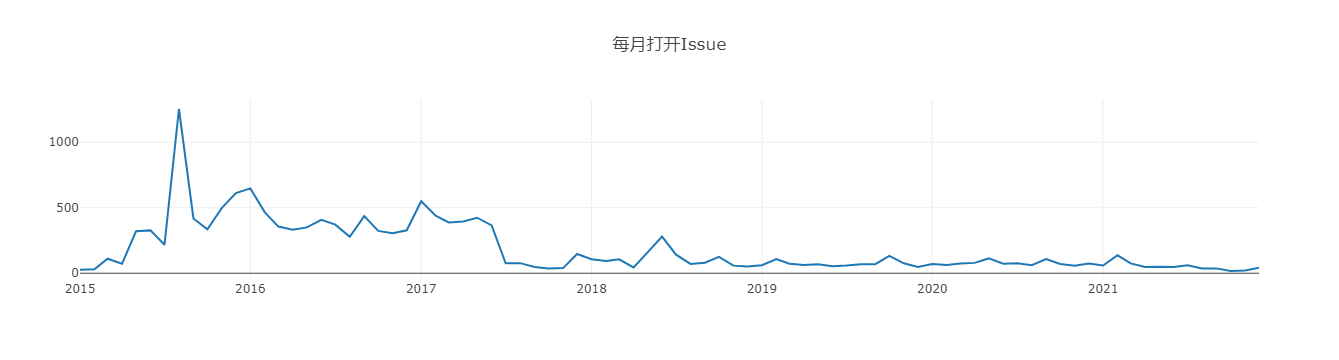

In [19]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssuesEvent'
        AND action = 'opened'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月打开Issue'});
    
})


# 2.2每月关闭Issue

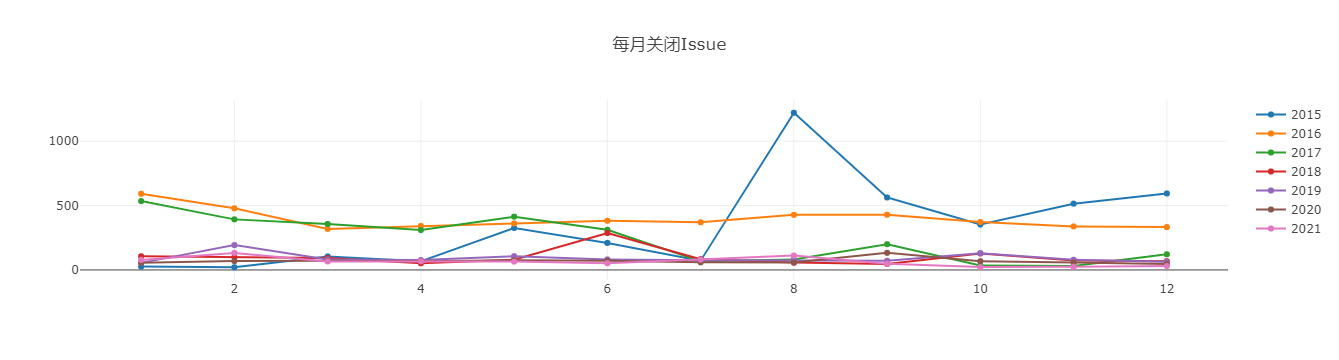

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  26   │ '2015-1'  │
│    1    │  21   │ '2015-2'  │
│    2    │  105  │ '2015-3'  │
│    3    │  67   │ '2015-4'  │
│    4    │  326  │ '2015-5'  │
│    5    │  210  │ '2015-6'  │
│    6    │  72   │ '2015-7'  │
│    7    │ 1221  │ '2015-8'  │
│    8    │  563  │ '2015-9'  │
│    9    │  353  │ '2015-10' │
│   10    │  515  │ '2015-11' │
│   11    │  594  │ '2015-12' │
│   12    │  592  │ '2016-1'  │
│   13    │  479  │ '2016-2'  │
│   14    │  319  │ '2016-3'  │
│   15    │  342  │ '2016-4'  │
│   16    │  361  │ '2016-5'  │
│   17    │  382  │ '2016-6'  │
│   18    │  370  │ '2016-7'  │
│   19    │  428  │ '2016-8'  │
│   20    │  429  │ '2016-9'  │
│   21    │  372  │ '2016-10' │
│   22    │  338  │ '2016-11' │
│   23    │  333  │ '2016-12' │
│   24    │  535  │ '2017-1'  │
│   25    │  393  │ '2017-2'  │
│   26    │  357  │ '2017-3'  │
│   27    │  310  │ '2017-4'  │
│   28  

In [22]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssuesEvent'
        AND action = 'closed'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月关闭Issue'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


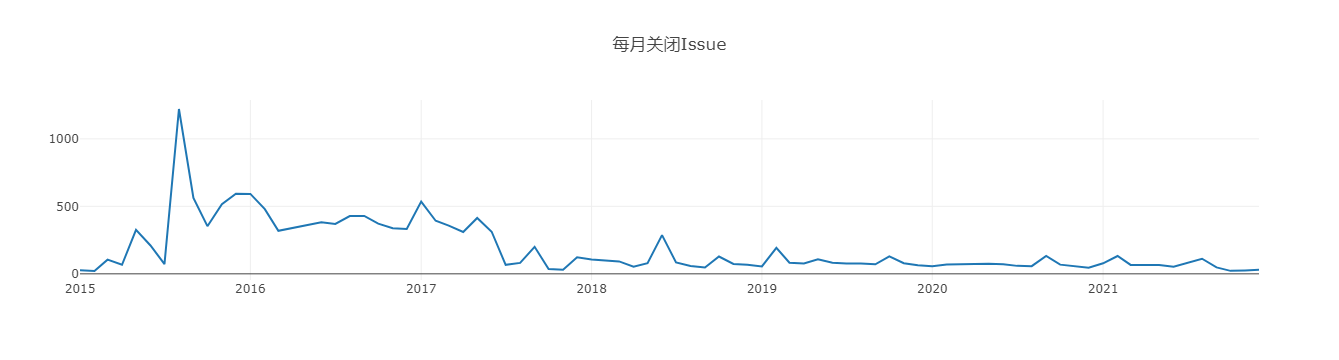

In [25]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssuesEvent'
        AND action = 'closed'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月关闭Issue'});
})


# 3.1 每月打开PR

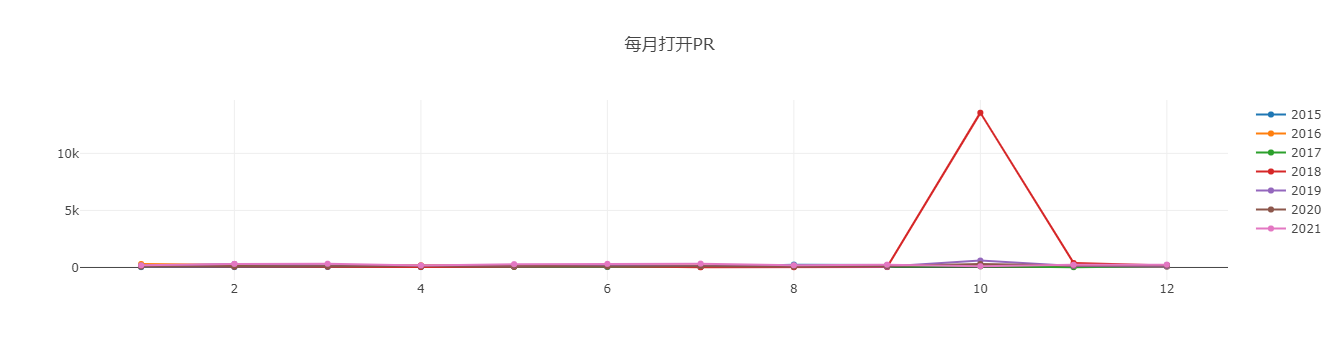

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  34   │ '2015-1'  │
│    1    │  35   │ '2015-2'  │
│    2    │  51   │ '2015-3'  │
│    3    │  34   │ '2015-4'  │
│    4    │  63   │ '2015-5'  │
│    5    │  53   │ '2015-6'  │
│    6    │  47   │ '2015-7'  │
│    7    │  249  │ '2015-8'  │
│    8    │  189  │ '2015-9'  │
│    9    │  190  │ '2015-10' │
│   10    │  210  │ '2015-11' │
│   11    │  207  │ '2015-12' │
│   12    │  304  │ '2016-1'  │
│   13    │  236  │ '2016-2'  │
│   14    │  143  │ '2016-3'  │
│   15    │  191  │ '2016-4'  │
│   16    │  158  │ '2016-5'  │
│   17    │  178  │ '2016-6'  │
│   18    │  170  │ '2016-7'  │
│   19    │  116  │ '2016-8'  │
│   20    │  148  │ '2016-9'  │
│   21    │  144  │ '2016-10' │
│   22    │  83   │ '2016-11' │
│   23    │  84   │ '2016-12' │
│   24    │  156  │ '2017-1'  │
│   25    │  198  │ '2017-2'  │
│   26    │  116  │ '2017-3'  │
│   27    │  78   │ '2017-4'  │
│   28  

In [32]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'opened'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月打开PR'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


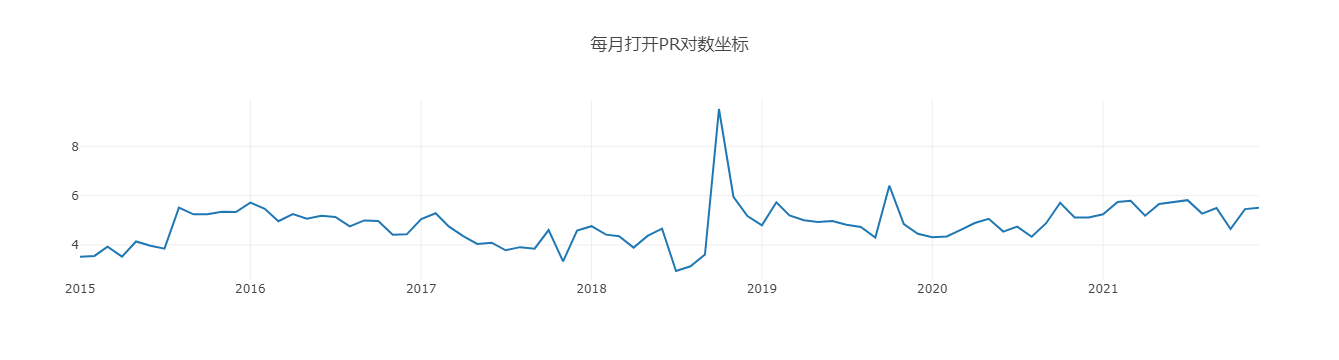

In [31]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'opened'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(oneMonth['count'])
            count.push(Math.log(oneMonth['count']))// 对数似乎更加清晰因为数据不在一个量级
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月打开PR对数坐标'});
})


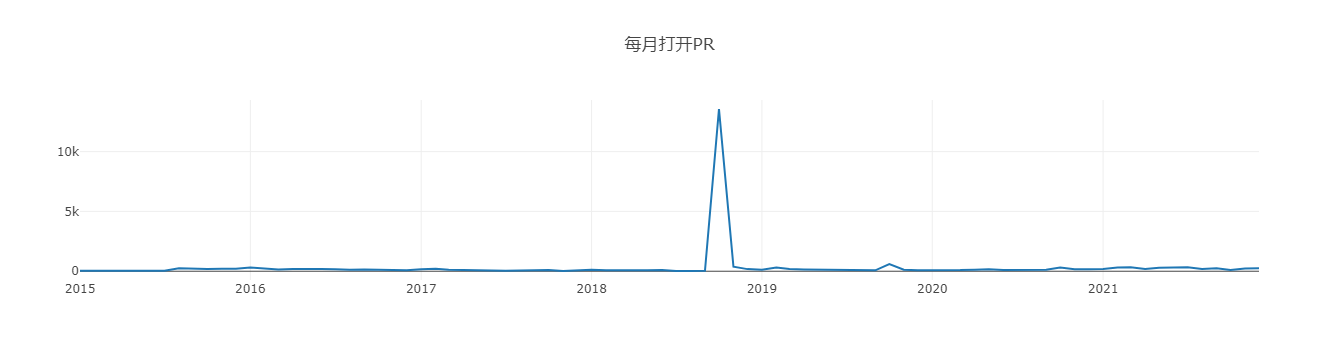

In [34]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'opened'
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            //count.push(Math.log(oneMonth['count']))// 对数似乎更加清晰因为数据不在一个量级
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月打开PR'});
})


# 每月关闭PR

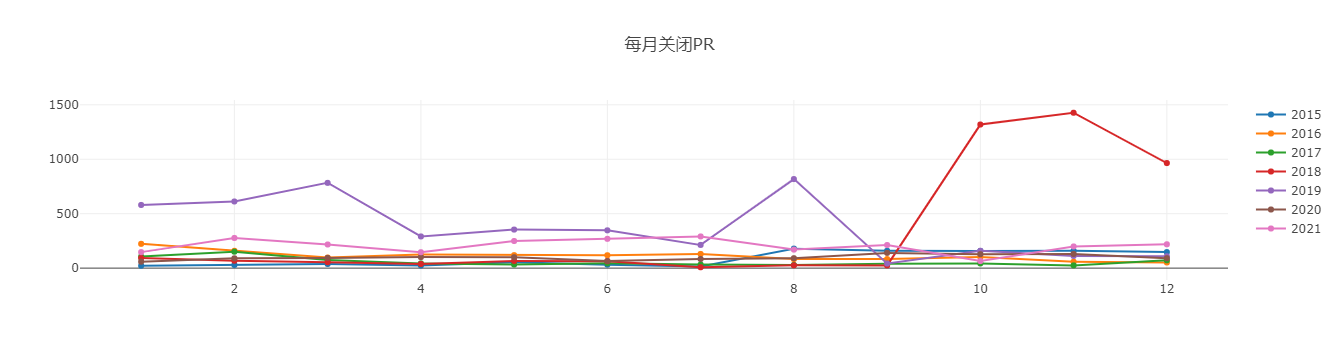

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  22   │ '2015-1'  │
│    1    │  29   │ '2015-2'  │
│    2    │  38   │ '2015-3'  │
│    3    │  24   │ '2015-4'  │
│    4    │  53   │ '2015-5'  │
│    5    │  32   │ '2015-6'  │
│    6    │  14   │ '2015-7'  │
│    7    │  179  │ '2015-8'  │
│    8    │  159  │ '2015-9'  │
│    9    │  158  │ '2015-10' │
│   10    │  160  │ '2015-11' │
│   11    │  147  │ '2015-12' │
│   12    │  223  │ '2016-1'  │
│   13    │  159  │ '2016-2'  │
│   14    │  97   │ '2016-3'  │
│   15    │  124  │ '2016-4'  │
│   16    │  119  │ '2016-5'  │
│   17    │  118  │ '2016-6'  │
│   18    │  130  │ '2016-7'  │
│   19    │  83   │ '2016-8'  │
│   20    │  83   │ '2016-9'  │
│   21    │  102  │ '2016-10' │
│   22    │  59   │ '2016-11' │
│   23    │  52   │ '2016-12' │
│   24    │  106  │ '2017-1'  │
│   25    │  151  │ '2017-2'  │
│   26    │  74   │ '2017-3'  │
│   27    │  43   │ '2017-4'  │
│   28  

In [41]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'closed'
        AND pull_merged = 1
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月关闭PR'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


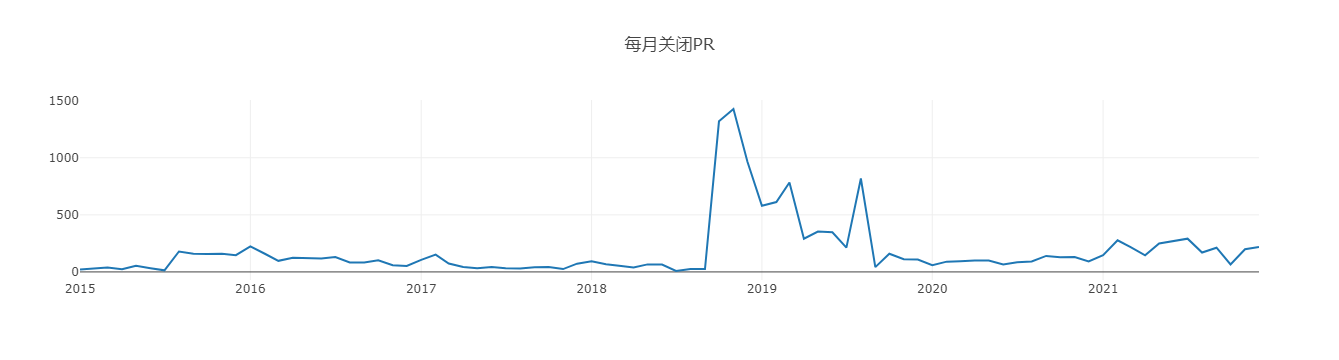

In [40]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT  count(*) count, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'closed'
        AND pull_merged = 1
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            //count.push(Math.log(oneMonth['count']))// 对数似乎更加清晰因为数据不在一个量级
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月关闭PR'});
})


# 4 每月活跃开发者

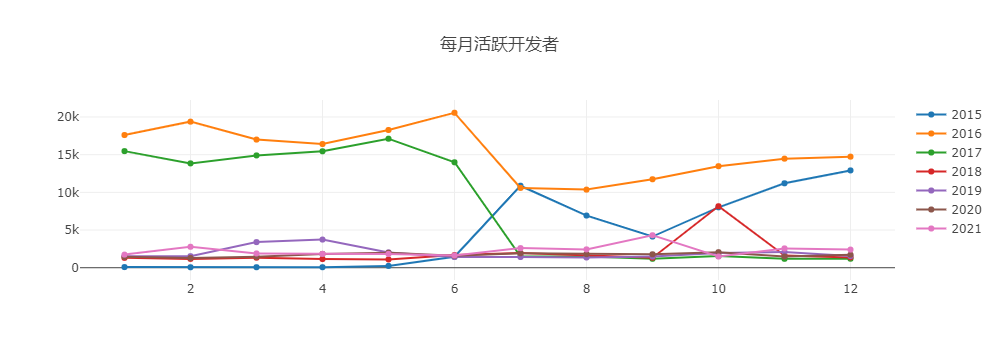

┌─────────┬───────┬───────────┐
│ (index) │ count │   month   │
├─────────┼───────┼───────────┤
│    0    │  85   │ '2015-1'  │
│    1    │  62   │ '2015-2'  │
│    2    │  66   │ '2015-3'  │
│    3    │  67   │ '2015-4'  │
│    4    │  240  │ '2015-5'  │
│    5    │ 1449  │ '2015-6'  │
│    6    │ 10881 │ '2015-7'  │
│    7    │ 6923  │ '2015-8'  │
│    8    │ 4135  │ '2015-9'  │
│    9    │ 8016  │ '2015-10' │
│   10    │ 11201 │ '2015-11' │
│   11    │ 12910 │ '2015-12' │
│   12    │ 17608 │ '2016-1'  │
│   13    │ 19382 │ '2016-2'  │
│   14    │ 17003 │ '2016-3'  │
│   15    │ 16412 │ '2016-4'  │
│   16    │ 18274 │ '2016-5'  │
│   17    │ 20563 │ '2016-6'  │
│   18    │ 10591 │ '2016-7'  │
│   19    │ 10363 │ '2016-8'  │
│   20    │ 11739 │ '2016-9'  │
│   21    │ 13471 │ '2016-10' │
│   22    │ 14472 │ '2016-11' │
│   23    │ 14738 │ '2016-12' │
│   24    │ 15470 │ '2017-1'  │
│   25    │ 13844 │ '2017-2'  │
│   26    │ 14900 │ '2017-3'  │
│   27    │ 15449 │ '2017-4'  │
│   28  

In [59]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT count(*) count, month FROM(
        SELECT distinct actor_id, toMonth(created_at) month FROM 
        github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year})
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = []
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            //count.push(Math.log(oneMonth['count'])) 对数似乎更加清晰因为数据不在一个量级
            count.push(oneMonth['count'])
            month.push(oneMonth['month'])
        })
        dataPlot.push({y:count, x:month, name:`${year}`})
        year += 1
    })
    openDigger.render.plotly(dataPlot, {title:'每月活跃开发者'});
    
    var table = []
    year = years[0]
    values.forEach(each=>{
        each.map(record=>{record['month']=year+'-'+record['month']})
        table.push(...each)
        year+=1
    })
    table.map(each=>{each['count']=parseInt(each['count'])})
    console.table(table)
})


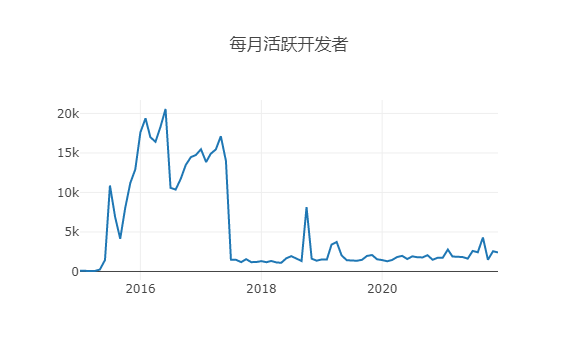

In [62]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT count(*) count, month FROM(
            SELECT distinct actor_id, toMonth(created_at) month FROM 
            github_log.events
            WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        )
        group by month
        order by month
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var dataPlot = [[],[]]
    var year = years[0]
    values.forEach(Oneyear=>{
        var count = []
        var month = []
        Oneyear.forEach(oneMonth=>{
            count.push(oneMonth['count'])
            //count.push(Math.log(oneMonth['count']))// 对数似乎更加清晰因为数据不在一个量级
            month.push(year + '-' + oneMonth['month'])
        })
        year+=1
        dataPlot[0].push(...count)
        dataPlot[1].push(...month)
    })
    openDigger.render.plotly([{y:dataPlot[0],x:dataPlot[1]}], {title:'每月活跃开发者'});
})


# 5 Issue 从打开到关闭的平均时长和中位数（单位：天）

In [136]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT dateDiff('day', issue_created_at, issue_closed_at) AS day 
        FROM github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssuesEvent'
        AND action = 'closed'
        ` 
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var sum = 0
    var count = 0
    var days = []
    values.forEach(year=>{year.forEach(item=>{
        sum+=parseInt(item['day'])
        days.push(parseInt(item['day']))
        count += 1
    })})
    days.sort()
    console.log("Issue 从打开到关闭的平均时长:" + parseInt(sum/count))
    if(days.length%2==0){
        console.log("Issue 从打开到关闭的中位数:" + parseInt((days[days.length/2-1]+days[days.length/2])/2))
    }else{
        console.log("Issue 从打开到关闭的中位数:" + parseInt(days[(days.length-1)/2]))
    }  
})


Issue 从打开到关闭的平均时长:31
Issue 从打开到关闭的中位数:1


# 6 PR 从打开到合入的平均时长和中位数（单位：天）

In [148]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT dateDiff('day', issue_created_at, pull_merged_at) AS day 
        FROM github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'PullRequestEvent'
        AND action = 'closed'
        AND pull_merged = 1
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var sum = 0
    var count = 0
    var days = []
    values.forEach(year=>{year.forEach(item=>{
        sum+=parseInt(item['day'])
        days.push(parseInt(item['day']))
        count += 1
    })})
    days.sort()
    console.log("PR 从打开到合入的平均时长:" + parseInt(sum/count))
    if(days.length%2==0){
        console.log("PR 从打开到合入的中位数:" + parseInt((days[days.length/2-1]+days[days.length/2])))
    }else{
        console.log("PR 从打开到合入的中位数:" + parseInt(days[(days.length-1)/2]))
    }  
})


PR 从打开到合入的平均时长:45
PR 从打开到合入的中位数:165


# 7 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [146]:
Promise.all(
    years.map(year=>{
    var q = `
        SELECT dateDiff('day', issue_created_at, created_at) AS day 
        FROM github_log.events
        WHERE repo_id = ${repo_id} And toYear(created_at) = ${year}
        AND type = 'IssueCommentEvent'
        AND action = 'created'
        AND issue_comments = 1
        AND issue_author_id != actor_id
        
        `
    return openDigger.driver.clickhouse.query(q)
    })
).then(values=>{
    var sum = 0
    var count = 0
    var days = []
    values.forEach(year=>{year.forEach(item=>{
        sum+=parseInt(item['day'])
        days.push(parseInt(item['day']))
        count += 1
    })})
    days.sort()
    console.log("Issue&PR从打开到第一次有人回复（非本人回复）平均数:" + parseInt(sum/count))
    if(days.length%2==0){
        console.log("Issue&PR从打开到第一次有人回复（非本人回复）中位数:" + parseInt((days[days.length/2-1]+days[days.length/2])/2))
    }else{
        console.log("Issue&PR从打开到第一次有人回复（非本人回复）中位数:" + parseInt(days[(days.length-1)/2]))
    }  
})


Issue&PR从打开到第一次有人回复（非本人回复）平均数:22
Issue&PR从打开到第一次有人回复（非本人回复）中位数:0
